## Tully-Fisher Relation Homework
Author: Tatsuo Schaufus
### Task 1: Use the given data tables to calibrate a Tully-Fisher relationship for the known galaxies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
%matplotlib inline

Since there was a lot of data to be held, I decided to add it into a `dat` file which I could simply call in for use. Values for inclination angle, internal extinction and absolute magnitude were given 0s as a placeholder.

In [3]:
# creating an array to hold all the given data for calibration
dtype = []
dtype.append( ('galaxy_name', 'U200') ) 
dtype.append( ('Inclination_angle', float) ) 
dtype.append( ('Distance_Mpc', float) ) 
dtype.append( ('Apparent_magnitude_B', float) ) 
dtype.append( ('Galactic_extinction', float) ) 
dtype.append( ('Major_axis', float) ) 
dtype.append( ('Minor_axis', float) ) 
dtype.append( ('HI_width', float) ) 
dtype.append( ('Galactic_extinction_internal', float) ) 
dtype.append( ('Absolute_Magnitude_B', float))

galaxies = np.genfromtxt('/home/taterz/galaxies.dat', dtype=dtype)

The next step was for me to determine those placeholder's real values, which were done with the estimations given from class. 

In [4]:
# using the data given to find inclination, internal extinction, and absolute magnitudes

galaxies['Inclination_angle'] = np.arccos(galaxies["Minor_axis"]/galaxies['Major_axis'])*180/np.pi

galaxies['Galactic_extinction_internal'] = 0.28*(galaxies["Major_axis"]/galaxies['Minor_axis'] - 1)

extinct=galaxies['Apparent_magnitude_B']-galaxies['Galactic_extinction']-galaxies['Galactic_extinction_internal']
galaxies['Absolute_Magnitude_B'] = -(5*np.log10(galaxies['Distance_Mpc']*100000)) + extinct

This next cell was just to confirm what all my values were, and allow myself to check to see if they are actually making sense. I had values of absolute magnitude in the -40s which I knew were wrong, and it took far too long to find I was using `np.log` and not `np.log10`. 

In [5]:
galaxies

array([('M31', 68.56273681, 0.71 ,  4.33, 0.44, 197. , 72. , 540., 0.48611111, -20.85240285),
       ('M33', 50.31590462, 0.817,  6.19, 0.12,  83. , 53. , 200., 0.15849057, -18.64960085),
       ('M81', 66.42182152, 3.25 ,  7.85, 0.07,  35. , 14. , 450., 0.42      , -20.1994168 ),
       ('NGC2403', 58.85261008, 3.25 ,  8.8 , 0.24,  29. , 15. , 270., 0.26133333, -19.26075014),
       ('NGC4236', 69.74775326, 3.25 , 10.05, 0.02,  26. ,  9. , 200., 0.52888889, -18.05830569),
       ('IC2574', 60.        , 3.25 , 10.91, 0.04,  16. ,  8. , 120., 0.28      , -16.9694168 ),
       ('NGC5204', 60.        , 3.25 , 11.41, 0.19,  10. ,  5. , 120., 0.28      , -16.6194168 ),
       ('NGC5585', 49.06727543, 7.24 , 11.25, 0.  ,   8.7,  5.7, 170., 0.14736842, -18.19606125),
       ('NGC5204', 49.45839813, 7.24 , 11.62, 0.  ,   8. ,  5.2, 130., 0.15076923, -17.82946206),
       ('HoIV', 65.45646012, 7.24 , 12.95, 0.  ,   6.5,  2.7, 110., 0.39407407, -16.74276691)],
      dtype=[('galaxy_name', '<U200

With everything looking good, the next step was to determine the corrected rotation speed. After which I made some single letter variables to make it easier for me to use the `polyfit` function. What I found was that these best fit algorithms were not accurately finding the lines of best fit, so I had to manually adjust it. Luckily this wasn't a long process.

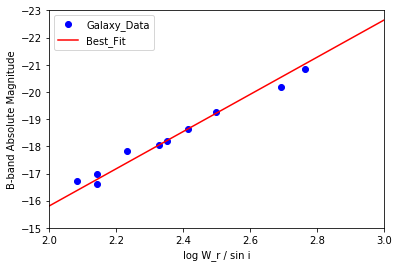

In [6]:
W_r = galaxies['HI_width']/np.sin(galaxies['Inclination_angle']*np.pi/180)
x = np.log10(W_r)
y = galaxies['Absolute_Magnitude_B']

# using polyfit to find best line
m, b = polyfit(x, y, 1)

# polyfit could use some manual adjustments
b = b + 4
m = m - 3


plt.plot(x, y, 'bo', label='Galaxy_Data')
plt.plot(np.arange(10), m*np.arange(10) + b, 'r-', label='Best_Fit')

plt.xlabel('log W_r / sin i')
plt.ylabel('B-band Absolute Magnitude')

plt.gca().invert_yaxis()
plt.legend(loc='best')
plt.xlim(2,3)
plt.ylim(-15,-23)
plt.show()

In [7]:
print("The a and b values for the Tulley-Fisher relation are ", m, "and ", b)

The a and b values for the Tulley-Fisher relation are  -6.839464201343622 and  -2.130795426602049


### Task 2: Calculate the distance to the galaxies NGC3893, NGC3953, and NGC3992. Estimate uncertainty. Determine the Hubble constant.

With the values for the slope and intercepts calculated, I could now use this to find the absolute magnitudes elsewhere. My first step was the exact same, I set up a new array to hold the values for the knowns and unknowns for the three galaxies. Unlike before, I did not make a `dat` file. Instead I created an empty array that I would fill with values later.

In [42]:
# creating a new array to hold the values for the estimated galaxies
dtype2 = []
dtype2.append( ('galaxy_name', 'U200') )  
dtype2.append( ('Distance_Mpc', float) ) 
dtype2.append( ('Apparent_magnitude_B', float) ) 
dtype2.append( ('HI_width', float) ) 
dtype2.append( ('Absolute_Magnitude_B', float))
dtype2.append( ('Recessional_Velocity', float))
dtype2.append( ('Galactic_extinction', float))

galaxies_est = np.empty(3, dtype=dtype2)

I then used a bit of a lazy approach to fill out the values, but I like the clean look of the copy paste.

In [44]:
# using the new array to hold the values for the estimations
galaxies_est[0] = 'NGC3893', 0, 10.6, 300, 0, 1030, 0.077
galaxies_est[1] = 'NGC3953', 0, 10.8, 450, 0, 1040, 0.109
galaxies_est[2] = 'NGC3992', 0, 10.7, 500, 0, 1130, 0.106

Given my extremely long variable names, I used an intermediary variable called `dist_mod` to hold the values for the distance modulus. This was calculated using the Tully-Fisher relation found previously. I also converted my distance from parsec to mega parsec manually, as I did not include the `unit` import.

In [45]:
# finding the values for the absolute magnitude using the Tully Fisher calibration
galaxies_est['Absolute_Magnitude_B'] = m*np.log10(galaxies_est['HI_width']) + b

# accounting for extinction
dist_mod = galaxies_est['Apparent_magnitude_B']-galaxies_est['Absolute_Magnitude_B'] - galaxies_est['Galactic_extinction']
galaxies_est['Distance_Mpc'] = 10**(dist_mod/5 + 1) / 1000000

The next line is just as before, to confirm whether or not the values make any amount of sense. Given that everything is falling within what the Schechter Function implies, I figured it was good.

In [46]:
galaxies_est

array([('NGC3893',  8.3022444 , 10.6, 300., -19.07297757, 1030., 0.077),
       ('NGC3953', 15.61958485, 10.8, 450., -20.27734743, 1040., 0.109),
       ('NGC3992', 17.25284936, 10.7, 500., -20.59030415, 1130., 0.106)],
      dtype=[('galaxy_name', '<U200'), ('Distance_Mpc', '<f8'), ('Apparent_magnitude_B', '<f8'), ('HI_width', '<f8'), ('Absolute_Magnitude_B', '<f8'), ('Recessional_Velocity', '<f8'), ('Galactic_extinction', '<f8')])

The next step was to plot my values and determine the Hubble constant. Given three points of data, I knew the line could not have a y-intercept greater than 0 otherwise it would make no sense. I once again tried to use `polyfit` to no avail, and adjusted the slope to a reasonable 80. 

Hubble constant estimation: 80 km/s/Mpc.


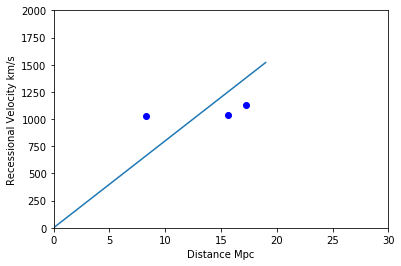

In [47]:
plt.plot(galaxies_est['Distance_Mpc'], galaxies_est['Recessional_Velocity'], 'bo')

m2, b2 = polyfit(galaxies_est['Distance_Mpc'], galaxies_est['Recessional_Velocity'], 1)
plt.plot(np.arange(20), np.arange(20)*80)

plt.xlabel('Distance Mpc')
plt.ylabel('Recessional Velocity km/s')

plt.xlim(0,30)
plt.ylim(0,2000)
print("Hubble constant estimation: 80 km/s/Mpc.")

Given that the current value of the Hubble constant is slightly less than 74 km/sec/Mpc, I would argue my value comes within a reasonable range. However, my algorithms to find the best fitting lines were not functioning as well as I would have hoped, so there is a bit of estimation error in those values. My decision to try 80 was based on Tully-Fisher's results, which I feel I have more or less reobtained in this assignment. 

The major sources of uncertainty would be in the measurements for the HI velocity width, as that was largely a guess on my part. Another slightly less potent source of extinction would be the measurement for the apparent magnitude. The uncertainty in the distance also could drastically affect the measurement for the magnitudes. The inclination angle is also a potentially massive source of error, since the division by the `sin` of this angle can alter the value of the rotational velocity. 